In [1]:
# MNIST dataset

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib notebook
%matplotlib inline

In [3]:
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4 <= Dynamic plotting
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    fig.canvas.draw()
    

In [4]:
# loading train-test data from keras mnist dataset
(X_train, y_train),(X_test, y_test) = mnist.load_data()

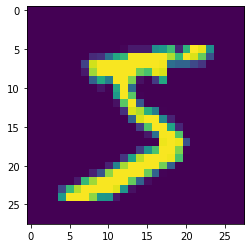

In [5]:
plt.imshow(X_train[0])

In [6]:
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.")

Training dataset shape (60000, 28, 28)  and  (60000,)
Test dataset shape (10000, 28, 28)  and  (10000,)
Training dataset have 60K images of 28x28 size and Test dataset have 10K images of 28x28 size.


In [7]:
# input is  2 dimensional vector(28x28 image)
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print("Training dataset shape",X_train.shape,' and ' ,y_train.shape)
print("Test dataset shape" , X_test.shape, ' and ',y_test.shape)
print("Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.")

Training dataset shape (60000, 784)  and  (60000,)
Test dataset shape (10000, 784)  and  (10000,)
Training dataset have 60K images of 1x784 size and Test dataset have 10K images of 1x784 size.


In [8]:
# printing datapoint
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### We can see the values in X_train[0] lies between 0 to 255 but so to apply any Neural Network algorithms we need to normlize it


In [9]:
# normlizing dataset
X_train = X_train/255.0
X_test = X_test/255.0
print("50 values from X_train[0]",X_train[0][140:160])
print("Now each values lies between 0 to 1")

50 values from X_train[0] [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
 0.68627451 0.10196078]
Now each values lies between 0 to 1


In [10]:
# we have output as number between 0 to 9
# we have to make it vector (OneHotEncoding)
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test,10)
print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# **1. Softmax** **Classifier**

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
# we can create sequential model by just adding layers like stack
# model parameter
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128
nb_epoch = 20

In [12]:
# creating sequential model
model = Sequential()

# The first layer in a Sequential model should know input shape 
# only the first should know input shape because following layers can do automatic shape inference)
# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

# we will use softmax because we are using multiclass classification

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [13]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/

model.compile(optimizer='sgd',loss="categorical_crossentropy", metrics=['accuracy'])

# fitting model on dataset
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test)) 

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2942 - accuracy: 0.6898 - val_loss: 0.8139 - val_accuracy: 0.8333
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.7178 - accuracy: 0.8420 - val_loss: 0.6066 - val_accuracy: 0.8631
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.8606 - val_loss: 0.5247 - val_accuracy: 0.8757
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.5244 - accuracy: 0.8697 - val_loss: 0.4788 - val_accuracy: 0.8830
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.8755 - val_loss: 0.4487 - val_accuracy: 0.8875
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4608 - accuracy: 0.8807 - val_loss: 0.4279 - val_accuracy: 0.8923
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8846 - val_loss: 0.4115 - val_accuracy: 0.8934
Epoch 

Test score: 0.3349783718585968
Test accuracy: 0.909500002861023


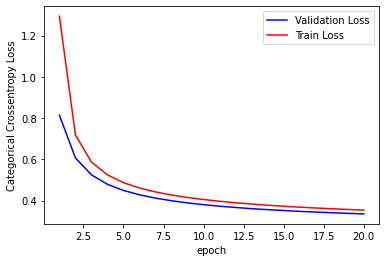

In [14]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


After 20 epoch we got 90% accuracy on unseen data.

# **2. MLP with sigmoid activation and SGD optimizer**

In [15]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid',input_shape=(input_dim,)))
model_sigmoid.add(Dense(128,activation='sigmoid'))
model_sigmoid.add(Dense(output_dim,activation='softmax'))

model_sigmoid.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_sigmoid.fit(X_train,y_train,batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 2.2715 - accuracy: 0.2068 - val_loss: 2.2256 - val_accuracy: 0.4192
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1823 - accuracy: 0.4449 - val_loss: 2.1269 - val_accuracy: 0.4879
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 2.0681 - accuracy: 0.5826 - val_loss: 1.9894 - val_accuracy: 0.6055
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 1.9071 - accuracy: 0.6391 - val_loss: 1.7986 - val_accuracy: 0.6833
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 1.6969 - accuracy: 0.6795 - val_loss: 1.5672 - val_accuracy: 0.7030
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 1.4642 - accuracy: 0.7197 - val_loss: 1.3364 - val_accuracy: 0.7534
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2491 - accuracy: 0.7535 - val_loss: 1.1382 - val_accuracy: 0.7743
Epoch 

Test score :  0.4576408565044403
Test accuracy:  0.8777999877929688


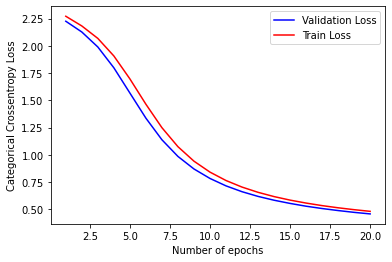

In [17]:
score = model_sigmoid.evaluate(X_test,y_test,verbose=0)
print("Test score : ", score[0])
print("Test accuracy: ", score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Number of epochs')
ax.set_ylabel("Categorical Crossentropy Loss")

x = list(range(1,1+nb_epoch))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


After 20 epoch we got 87% accuracy on unseen data.

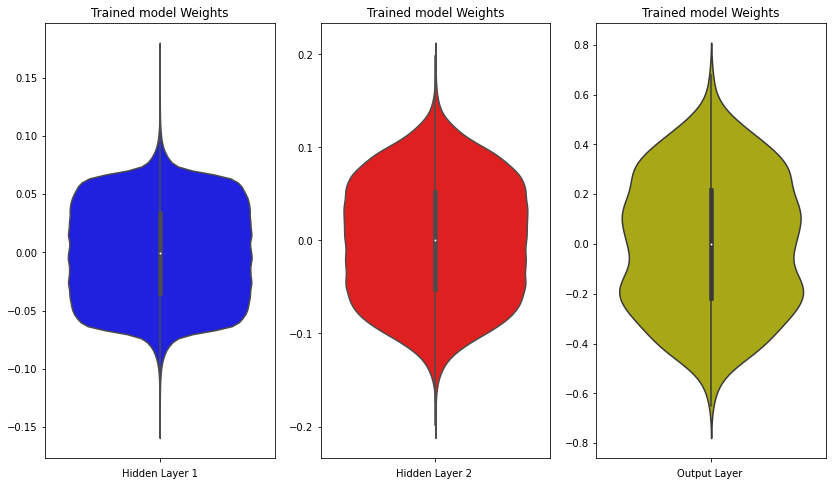

In [18]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(14,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3. MLP with relu activation and Adam optimizer**

In [19]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0,stddev=0.05, seed=None)))
model_relu.add(Dense(128,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.125,seed=None)))
model_relu.add(Dense(output_dim,activation='softmax'))

model_relu.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_relu.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model_relu.fit(X_train,y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2262 - accuracy: 0.9324 - val_loss: 0.1114 - val_accuracy: 0.9661
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0870 - accuracy: 0.9734 - val_loss: 0.0838 - val_accuracy: 0.9736
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0752 - val_accuracy: 0.9755
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0800 - val_accuracy: 0.9781
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.0668 - val_accuracy: 0.9817
Epoch 

Test score :  0.10814718902111053
Test accuracy:  0.9779999852180481


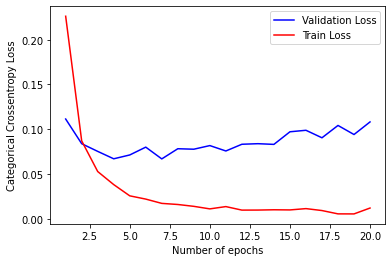

In [21]:
score = model_relu.evaluate(X_test,y_test,verbose=0)
print("Test score : ", score[0])
print("Test accuracy: ", score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('Number of epochs')
ax.set_ylabel("Categorical Crossentropy Loss")
x = list(range(1,1+nb_epoch))
# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

We got 98% accuracy on unseen test data.

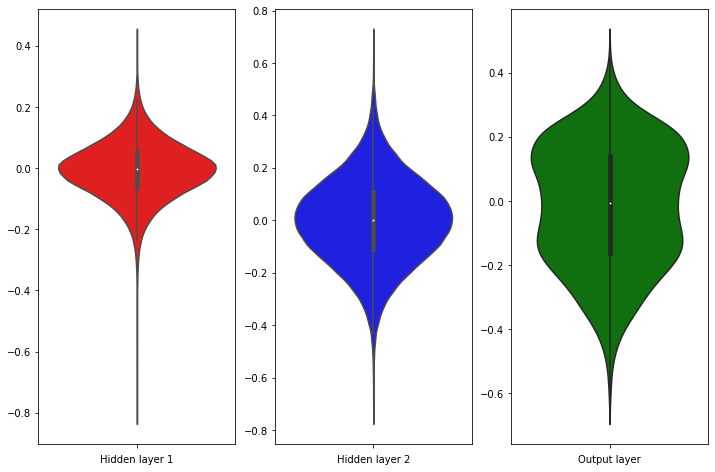

In [22]:
w_after = model_relu.get_weights()
hidden1_w = w_after[0].flatten().reshape(-1,1)
hidden2_w = w_after[2].flatten().reshape(-1,1)
output_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
ax = sns.violinplot(y=hidden1_w,color='r')
plt.xlabel('Hidden layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=hidden2_w,color='b')
plt.xlabel('Hidden layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=output_w,color='g')
plt.xlabel('Output layer')

plt.show()

# **4. MLP + Batch Normlization and Adam optimizer**

In [23]:
# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(Ni+N(i+1)). sqrt(2/(f_in + f_out))
# sqrt(2/(784+512))
# h1 => Ni=784 and N(i+1)=512 => σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# sqrt(2/(512+128))
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# sqrt(2/(128+10))
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization


model_batch = Sequential()

model_batch.add(Dense(512,activation='sigmoid',input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0,stddev=0.039,seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128,activation='sigmoid', kernel_initializer=RandomNormal(mean=0,stddev=0.055,seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim,activation='softmax'))


model_batch.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [24]:
model_batch.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model_batch.fit(X_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2717 - accuracy: 0.9215 - val_loss: 0.1803 - val_accuracy: 0.9515
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1405 - accuracy: 0.9597 - val_loss: 0.1214 - val_accuracy: 0.9644
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1000 - accuracy: 0.9708 - val_loss: 0.1012 - val_accuracy: 0.9700
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0752 - accuracy: 0.9775 - val_loss: 0.0964 - val_accuracy: 0.9705
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0581 - accuracy: 0.9830 - val_loss: 0.0941 - val_accuracy: 0.9722
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0817 - val_accuracy: 0.9745
Epoc

Test Score :  0.08613009750843048
Test Accuracy :  0.9782999753952026


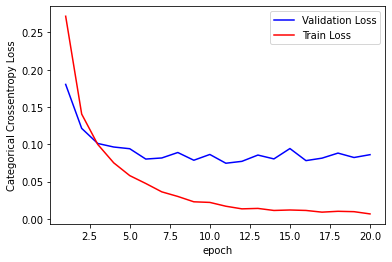

In [25]:
score = model_batch.evaluate(X_test,y_test,verbose=0)
print("Test Score : ",score[0])
print("Test Accuracy : ",score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel("epoch")
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x,vy,ty,ax)


We got ~98% accuracy on unseen test data.

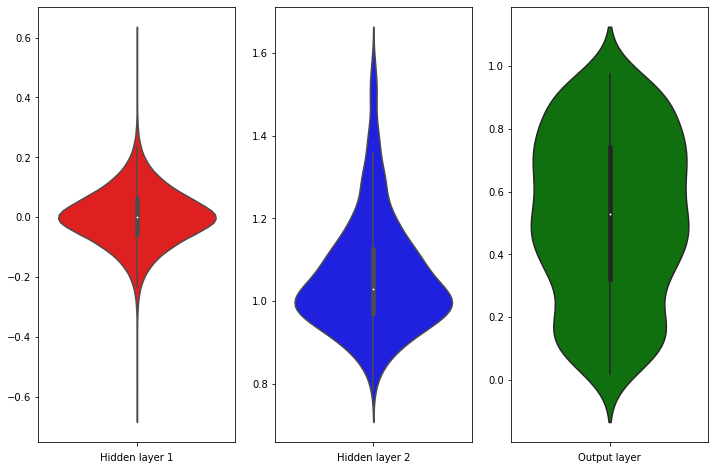

In [26]:
w_after = model_batch.get_weights()
hidden1_w = w_after[0].flatten().reshape(-1,1)
hidden2_w = w_after[2].flatten().reshape(-1,1)
output_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(12,8))
plt.title("Weight matrices after model trained")
plt.subplot(1,3,1)
ax = sns.violinplot(y=hidden1_w,color='r')
plt.xlabel('Hidden layer 1')

plt.subplot(1,3,2)
ax = sns.violinplot(y=hidden2_w,color='b')
plt.xlabel('Hidden layer 2')

plt.subplot(1,3,3)
ax = sns.violinplot(y=output_w,color='g')
plt.xlabel('Output layer')

plt.show()